## Filtering dataset by CIDm files only and Setting Experimental Score Threshold
In order to avoid redundancy that could lead to overfitting, decided to include just one chemical file type in the dataset (both types defined below). After realizing that CIDs type did not have 1:1 mapping of chemical id to SMILES sequence (and CIDm did), I chose to use CIDm. The dataset was then filtered by setting an experimental score threshold in order to only include binding pairs that have high binding affinity.
- CIDs: stereospecific and static
- CIDm: represented with rotatable bonds (non stereospecific)

In [1]:
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
protchem_binding = pd.read_table('protchem_binding.tsv') 

In [4]:
protchem_binding.head(5)
# recall this contains all the binding chemical-protein pairs
# no threshold for experimental value has been set yet

,Unnamed: 0,chemical,protein,experimental,prediction,database,textmining,combined_score
0,0,CIDs23627457,9606.ENSP00000353915,191,0,0,0,191
1,1,CIDs44408029,9606.ENSP00000256906,521,0,0,0,521
2,2,CIDs23590374,9606.ENSP00000267377,159,170,0,0,282
3,3,CIDs73351473,9606.ENSP00000295589,267,0,0,0,267
4,4,CIDs10666045,9606.ENSP00000336630,209,0,0,0,209


In [41]:
pc_binding = protchem_binding.drop(['Unnamed: 0', 'prediction', 'database', 'textmining', 'combined_score'], axis=1) 
# result just has chemical, protein, and experimental columns

In [42]:
pc_binding = pc_binding[~pc_binding['chemical'].str.contains("CIDs")] 
# only keeps pairs with CIDm (decided to use just CIDm chemical IDs) 

In [43]:
testorder1 = pc_binding['chemical'].str.contains("CIDs") 
# just to check if any CIDs remain in df

In [44]:
any(testorder1) 

False

In [45]:
pc_binding = pc_binding.sort_values(by=['chemical']) 
# sorts rows according to CIDm ID #... ascending order

In [46]:
pc_binding = pc_binding.reset_index(drop=True) 
# resets the index

In [47]:
len(pc_binding) 

4232486

In [48]:
pc_binding = pc_binding[pc_binding.experimental !=0] 
# removes rows (interaction pairs) with an experimental value of 0

In [49]:
len(pc_binding) 

4223711

Text(0,0.5,u'Frequency')

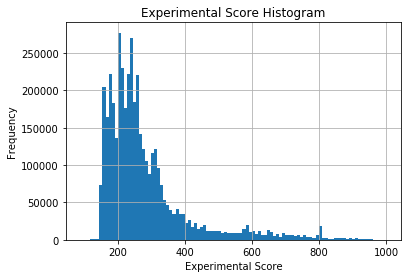

In [39]:
hist_plot = pc_binding.experimental.hist(bins=100)
hist_plot.set_title('Experimental Score Histogram')
hist_plot.set_xlabel('Experimental Score')
hist_plot.set_ylabel('Frequency') 
# distribution of experimental values

In [61]:
pc_binding = pc_binding[pc_binding.experimental >=200] 
# go with 200 as threshold now (keeping 75% of data) and change later if needed

In [62]:
pc_binding.to_csv('pc_binding.tsv', sep='\t') 